In [22]:
# Import used libraries
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans,AgglomerativeClustering
from sklearn.metrics import silhouette_score

In [23]:
# Data loading functions. Uncomment the one you want to use
from adni.load_data import load_data

data = load_data()
print('The dataset ABNI contains the following\n')
print(f'The number of samples/patients: {len(data.index)}')
print(f'The number of columns/features: {len(data.columns)}')

The dataset ABNI contains the following

The number of samples/patients: 855
The number of columns/features: 268


# Basic Data analysis
Look at the overal structure of the data including types of values, number of values and basic statistics such as max, min, mean, std

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 855 entries, 0_002_S_0413_bl_0 to 0_941_S_5193_bl_0
Columns: 268 entries, hf_energy to vf_Frangi_inner_std_SR(1.0, 10.0)_SS2.0
dtypes: float64(257), int64(10), object(1)
memory usage: 1.8+ MB


In [69]:
data.describe()

,hf_energy,hf_entropy,hf_kurtosis,hf_max,hf_mean,hf_median,hf_min,hf_peak,hf_quartile_range,hf_range,...,"vf_Frangi_inner_kurtosis_SR(1.0, 10.0)_SS2.0","vf_Frangi_inner_max_SR(1.0, 10.0)_SS2.0","vf_Frangi_inner_mean_SR(1.0, 10.0)_SS2.0","vf_Frangi_inner_median_SR(1.0, 10.0)_SS2.0","vf_Frangi_inner_min_SR(1.0, 10.0)_SS2.0","vf_Frangi_inner_peak_SR(1.0, 10.0)_SS2.0","vf_Frangi_inner_quartile_range_SR(1.0, 10.0)_SS2.0","vf_Frangi_inner_range_SR(1.0, 10.0)_SS2.0","vf_Frangi_inner_skewness_SR(1.0, 10.0)_SS2.0","vf_Frangi_inner_std_SR(1.0, 10.0)_SS2.0"
count,855.000000,855.000000,855.000000,855.000000,855.000000,855.000000,855.000000,855.000000,855.000000,855.000000,...,855.000000,8.550000e+02,8.550000e+02,8.550000e+02,8.550000e+02,855.000000,8.550000e+02,8.550000e+02,855.000000,8.550000e+02
mean,3132.693138,4.725351,1.752785,1.806551,1.129672,1.208938,0.075205,300.777778,0.511669,1.731345,...,1.801424,1.266830e-09,4.565865e-10,3.711804e-10,1.064416e-10,16.407018,3.762215e-10,1.160389e-09,1.129984,3.265352e-10
std,2823.338029,0.322015,1.888511,0.279599,0.303533,0.293002,0.415439,96.252898,0.301788,0.370355,...,5.187279,1.067436e-09,3.994524e-10,3.695176e-10,1.896654e-10,25.606515,3.463014e-10,1.025276e-09,1.023081,2.756521e-10
min,59.642400,3.956519,-1.556002,0.963094,0.159041,0.048083,-0.738934,21.000000,0.205472,0.790367,...,-3.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,0.000000e+00,0.000000e+00,-1.395524,0.000000e+00
25%,1340.246316,4.465217,0.154278,1.603323,0.945029,1.047791,-0.255810,225.000000,0.311095,1.450877,...,-0.900426,6.037219e-10,1.894943e-10,1.105618e-10,9.442175e-24,2.000000,1.546043e-10,4.824618e-10,0.357840,1.553927e-10
50%,2168.524057,4.679203,1.981116,1.795893,1.126893,1.206801,0.018291,304.000000,0.375597,1.724990,...,0.524971,1.027719e-09,3.721065e-10,2.864644e-10,1.194204e-11,7.000000,3.089986e-10,9.217549e-10,1.024016,2.721868e-10
75%,3741.582163,4.994387,3.062567,1.989523,1.316522,1.381416,0.368919,367.000000,0.588420,1.988372,...,2.842516,1.649296e-09,6.114185e-10,5.221605e-10,1.413886e-10,20.000000,4.979078e-10,1.560705e-09,1.718258,4.262481e-10
max,18554.633717,5.402261,8.237613,3.415949,2.131128,2.141425,1.373523,636.000000,1.578203,3.372784,...,64.852716,8.211800e-09,3.071739e-09,2.844013e-09,1.641528e-09,236.000000,2.751437e-09,7.857531e-09,6.723008,2.092181e-09


# Exploratory Data Analysis
Deep dive into the data for missing values, irregular values, non compliant features etc.

In [54]:
data_statistics=data.describe()

Text(0.5,1,'Mean values columns')

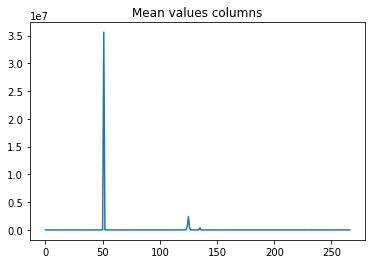

In [62]:
plt.figure();
plt.plot(range(267),data_statistics.loc['mean',:])
plt.title("Mean values columns")

In [68]:
data_statistics[np.argmax(data_statistics.loc['mean',:])]

/usr/lib/python3/dist-packages/numpy/core/fromnumeric.py:57: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return getattr(obj, method)(*args, **kwds)


count    8.550000e+02
mean     3.559411e+07
std      9.592060e+06
min      2.327506e+06
25%      2.874003e+07
50%      3.559613e+07
75%      4.200414e+07
max      6.764746e+07
Name: phasef_monogenic_energy_WL3_N5, dtype: float64

## Missing Values
Initial results show no missing data. Is this correct?

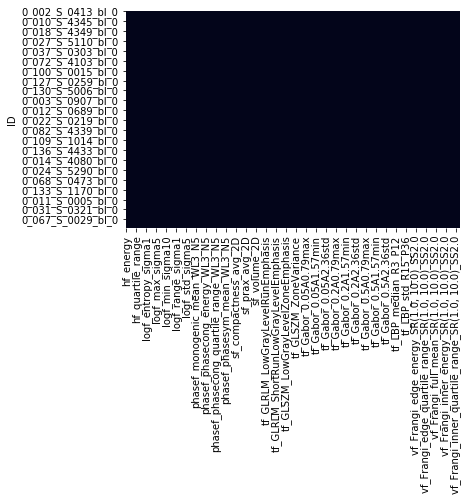

In [82]:
pd.options.mode.use_inf_as_na = True
plt.figure()
sns.heatmap(data.isnull(),cbar=False)


## Preprocess Data

In [49]:
samples= data.drop(['label'],axis=1)
labels=[1 if "AD" in str(i) else 0 for i in data['label']]

# Simple Clustering
Using clustering to get a initial insight into data similairity for the given problem

## K-means Clustering

In [52]:
for i in range(2,10):
    kmeans=KMeans(n_clusters=i,n_init=200,max_iter=800).fit(samples)
    score=silhouette_score(samples,kmeans.labels_)
    print("The calculated silhouette score for {} clusters is {}".format(i,score))

The calculated silhouette score for 2 clusters is 0.5040025059137542
The calculated silhouette score for 3 clusters is 0.4724853116359765
The calculated silhouette score for 4 clusters is 0.4380625126675771
The calculated silhouette score for 5 clusters is 0.4280194822458282
The calculated silhouette score for 6 clusters is 0.41348231836743693
The calculated silhouette score for 7 clusters is 0.38553706720012526
The calculated silhouette score for 8 clusters is 0.3902483009806695
The calculated silhouette score for 9 clusters is 0.37392003186665224
